In [0]:
import pandas as pd
uri = "https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula3.1/movies.csv"
movies = pd.read_csv(uri)

movies.head()



,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
uri = "https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula3.1/ratings.csv"
ratings = pd.read_csv(uri)

ratings.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
ratings["rating"].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [0]:
ratings['rating'].min()

0.5

In [0]:
ratings.describe()  

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [0]:
ratings.rating.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: rating, dtype: float64

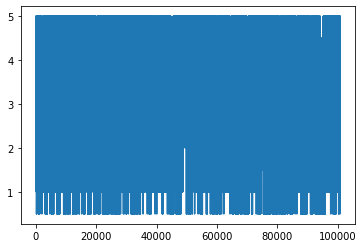

In [0]:
# plotando dados
ratings.rating.plot()
# por padrao pega os indicies e os valores coloca um ponto num gráfico e
# liga com um gráfico

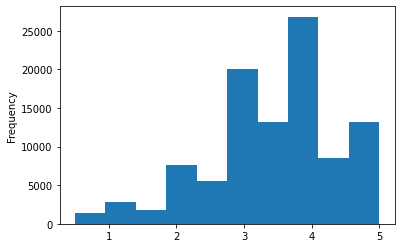

In [0]:
ratings.rating.plot(kind = "hist")

In [0]:
# fazendo a media e mediana
print("Media", ratings['rating'].mean())
print("Mediana", ratings['rating'].median())

Media 3.501556983616962
Mediana 3.5


In [0]:
ratings.rating.describe()
# std = desvio padrao   

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

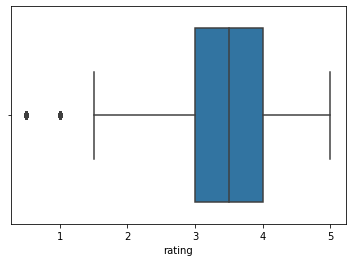

In [0]:
import seaborn as sns
sns.boxplot(ratings.rating)
# mediana é a metade do box

In [0]:
# filmes
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Analisando notas de cada filme


In [0]:
# Analisando notas por filme
# media do filme com id 1
# Podemos ver que a media de notas dele é maior que a média de notas de todos os filmes  
ratings.query("movieId == 1").rating.mean()  

3.9209302325581397

In [0]:
# Mediana do  segundo filme
ratings.query("movieId == 2").rating.median()

3.5

In [0]:
# Media por filme
medias_por_filme = ratings.groupby("movieId").mean()["rating"]
medias_por_filme.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

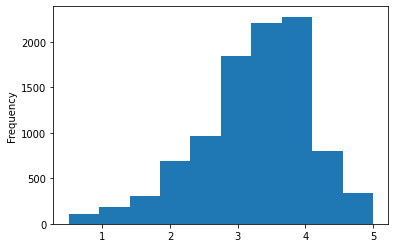

In [0]:
medias_por_filme.plot(kind = "hist")


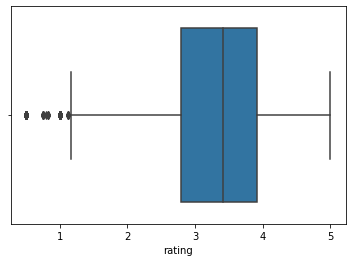

In [0]:
sns.boxplot(medias_por_filme)

In [0]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: rating, dtype: float64

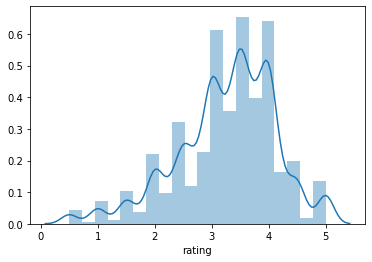

In [0]:
# histograma no seaborn
sns.distplot(medias_por_filme, bins = 20)

# Testando formas de visualização 

Text(0.5, 1.0, 'Histograma das medias dos filmes')

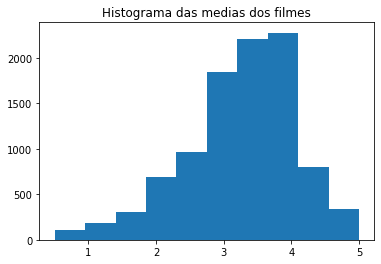

In [0]:
import matplotlib.pyplot as plt
plt.hist(medias_por_filme)
plt.title("Histograma das medias dos filmes")

In [0]:
tmdb = pd.read_csv("/tmdb_5000_movies.csv")

In [0]:
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [0]:
# vendo as linguas desse dataset
tmdb.original_language.unique()
# variavel categórica nominal
# não há ordem

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [0]:
# extraindo a quantidade de filmes por língua
# tmdb.original_language.value_counts() # retorna uma serie
contagem_de_linguas = tmdb.original_language.value_counts().to_frame().reset_index() # retorna em frame
contagem_de_linguas.columns = ["original_language", "total"]
contagem_de_linguas.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


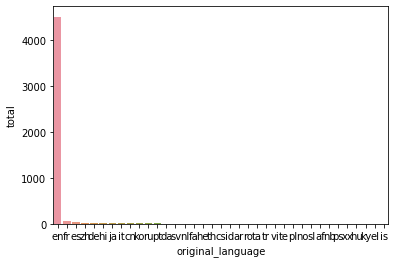

In [0]:
sns.barplot(x = "original_language", y = "total", data = contagem_de_linguas)

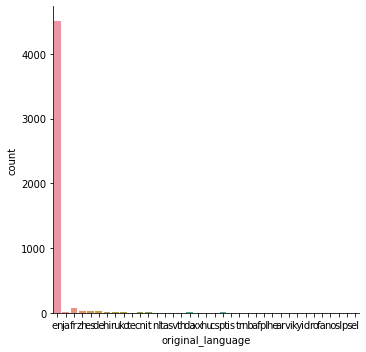

In [0]:
sns.catplot(x = "original_language", kind = "count", data = tmdb)
# forma mais fácil

In [0]:
total_por_lingua = tmdb.original_language.value_counts()
total_de_ingles = total_por_lingua.loc["en"]
total_geral = total_por_lingua.sum()
total_fora_ingles = total_geral - total_de_ingles

dados = {
    "lingua": ["ingles", "outros"],
    "total": [total_de_ingles, total_fora_ingles]
}

dados = pd.DataFrame(dados);
dados

,lingua,total
0,ingles,4505
1,outros,298


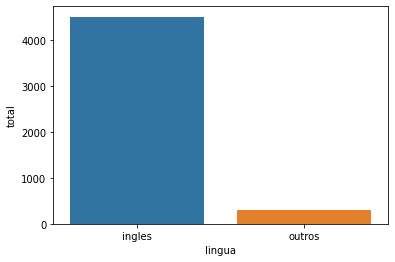

In [0]:
 sns.barplot(x = 'lingua', y = 'total', data = dados)

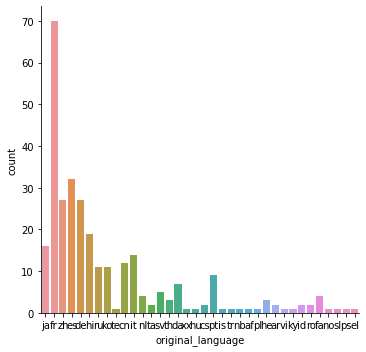

In [0]:
dataset_except_english = tmdb.query("original_language != 'en'")
sns.catplot(x = "original_language", kind = "count", data = dataset_except_english)

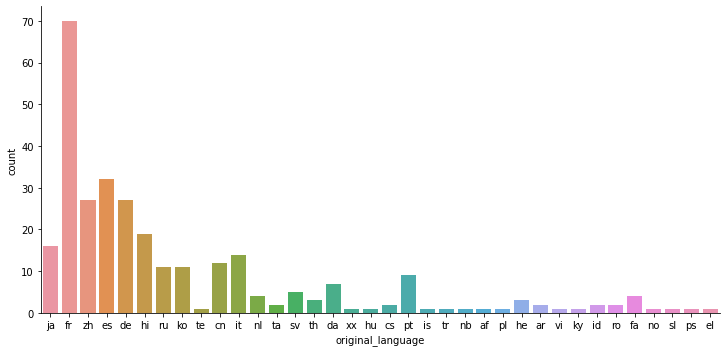

In [0]:
# ajustando tamanho do gráfico
# olhar na doc do seaborn para mais info sobre os parâmetros do catplot
sns.catplot(x = "original_language", kind = "count", data = dataset_except_english, aspect = 2)

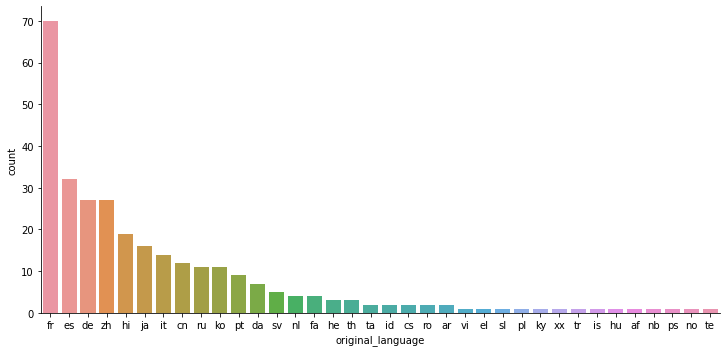

In [0]:
#  colocando ordem, importante quando plotar por categória.
sns.catplot(x = "original_language", kind = "count", data = dataset_except_english, aspect = 2,
            order = dataset_except_english.original_language.value_counts().index)

 # Média, Mediana e Desvio padrão 
 

In [0]:
movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [0]:
# vamos pegar algumas infomarções desses 2 filmes
notas_toy_story = ratings.query("movieId == 1")
notas_jumanji = ratings.query("movieId == 2")

print("Nota media do ToyStory %.2f" % notas_toy_story.rating.mean())
print("Nota media do Jumanji %.2f\n\n" % notas_jumanji.rating.mean())


print("Nota mediana do ToyStory %.2f" % notas_toy_story.rating.median())
print("Nota mediana do Jumanji %.2f\n\n" % notas_jumanji.rating.median())

Nota media do ToyStory 3.92
Nota media do Jumanji 3.43


Nota mediana do ToyStory 4.00
Nota mediana do Jumanji 3.50




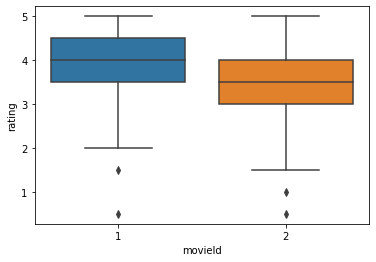

In [0]:
# Uma forma de mostrar esses dados visualmente
sns.boxplot(x = "movieId", y = "rating", data = ratings.query("movieId in [1,2]"))

(array([ 1.,  1.,  2.,  5., 12., 28., 11., 36.,  7.,  7.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <a list of 10 Patch objects>)

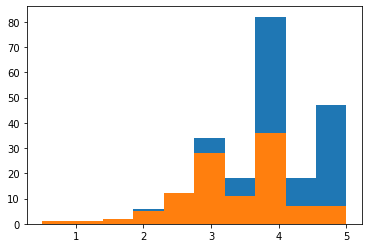

In [0]:
 plt.hist(ratings.query("movieId == 1").rating)
 plt.hist(ratings.query("movieId == 2").rating)